# Tehtävä 0.
## Aihe: Ympäristön pystytys

Luo ohjelmointiympäristö asentamalla syväoppimiseen tarvittavat kirjastot. Seuraa materiaaleista "ympäristön_pystytys.md" ohjeita.

Kun olet asentanut kirjastot, aja alla oleva solu. Jos ei tule virhettä, niin ympäristösi on asennettu oikein.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf

print(tf.__version__) # Pitäisi tulostaa tensorflow 2.0 tai uudempi versio

2.3.0


In [ ]:
# jos olet asentanut Tensorflowin GPU eli näytönohjain version, alla olevan funktion pitäisi palauttaa "True". 
# Jos et käytä Tensorflowin GPU versiota, älä välitä tästä.
tf.test.is_gpu_available(cuda_only=True)

# Tehtävä 1
### Aihe: Datan esikäsittely ja ohjattu oppiminen
3,3 pistettä

1. Katso diabetes - datasetin tiedot Kagglesta https://www.kaggle.com/uciml/pima-indians-diabetes-database ja lataa "likainen" versio tästä datasetistä osoitteesta https://student.labranet.jamk.fi/~korpjo/files/diabetes.csv

2. Lataa csv-tiedosto Pandas DataFrameen, suorita seuraavat datan siivoamisoperaatiot:
    * Pudota NaN rivit
    * Pudota identtiset rivit
    * Korvaa suuresti poikkeavat arvot jollakin järkevällä arvolla (Vinkki: Visualisoi sarakkeiden arvot)

3. Tämän jälkeen skaalaa data käyttäen standardisointia tai minimi-maksimi skaalausta.

4. Muuta datasetti valvotun oppimisen muotoon, eli erottele data ominaisuuksiin ja ennustettaviin arvoihin. 

5. Jaa datasetti koulutus- ja testidatasettiin.

6. Aja "Tehtävän vastaukset" solu, jossa todistetaan, että DataFrame on siivottu ja valmis koneoppimisen malleille:
    * Ei identtisiä rivejä (Funktion df.duplicated().any().sum() tulos on 0)
    * Ei NaN rivejä (Funktion df.isna().any().sum() tulos on 0)

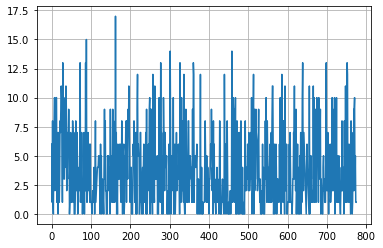

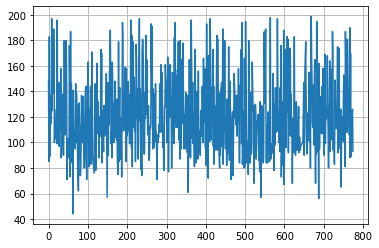

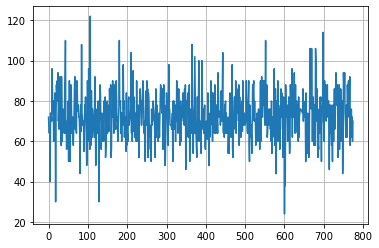

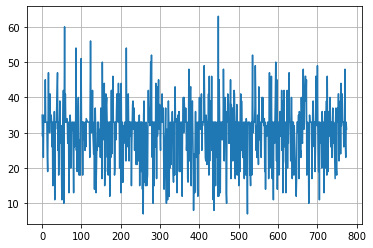

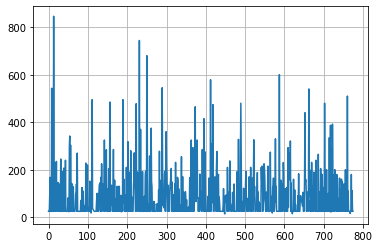

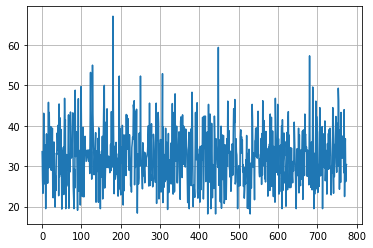

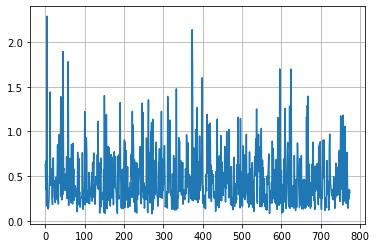

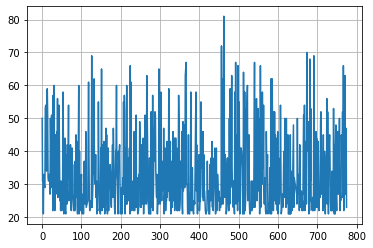

In [2]:
###### Tehtävän toteutus
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

url = "https://student.labranet.jamk.fi/~korpjo/files/diabetes.csv"
df = pd.read_csv(url) #775 rows x 9 columns
df = df.dropna() #762 rows x 9 columns
df = df.drop_duplicates(keep='first') #755 rows x 9 columns -- Success!

#print("Amount of NaN rows in dataframe: ",df.isna().any().sum())
#print("Amount of duplicate rows in dataframe: ",df.duplicated().any().sum())

df.loc[290, 'Pregnancies'] = (df.loc[289]['Pregnancies'] + df.loc[291]['Pregnancies']) / 2
df.loc[290, 'Pregnancies'] = df.loc[290, 'Pregnancies'].round(0)

#print("\n Initial DF: \n", df)

GlucoseValue = ((df.loc[62]['Glucose'] + df.loc[100]['Glucose'] + df.loc[450]['Glucose']) / 3).round(0)
df.loc[df['Glucose'] < 44, 'Glucose'] = df.loc[df['Glucose'] < 44, 'Glucose'].replace(0, GlucoseValue)

BLV = (df.loc[150]['BloodPressure'] + df.loc[560]['BloodPressure'] + df.loc[770]['BloodPressure']) / 3
df.loc[df['BloodPressure'] < 24, 'BloodPressure'] = df.loc[df['BloodPressure'] < 24, 'BloodPressure'].replace(0, BLV)

STV = ((df.loc[40]['SkinThickness'] + df.loc[150]['SkinThickness'] + df.loc[400]['SkinThickness']) / 3).round(0)
df.loc[df['SkinThickness'] == 0, 'SkinThickness'] = df.loc[df['SkinThickness'] == 0, 'SkinThickness'].replace(0, STV)
df.loc[df['SkinThickness'] >= 72, 'SkinThickness'] = df['SkinThickness'].values[df['SkinThickness'] >= 72] = STV

InsulinValue = (df.loc[60]['Insulin'] + df.loc[380]['Insulin'] + df.loc[750]['Insulin']) / 3 #25.0
df.loc[df['Insulin'] == 0, 'Insulin'] = df.loc[df['Insulin'] == 0, 'Insulin'].replace(0, InsulinValue)

BMI = (df.loc[60]['BMI'] + df.loc[300]['BMI'] + df.loc[600]['BMI']) / 3
df.loc[df['BMI'] < 18, 'BMI'] = df.loc[df['BMI'] < 18, 'BMI'].replace(0, BMI)

DPFV = (df.loc[3]['DiabetesPedigreeFunction'] + df.loc[410]['DiabetesPedigreeFunction'] + df.loc[770]['DiabetesPedigreeFunction']) / 3
df.loc[df['DiabetesPedigreeFunction'] > 2.288, 'DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].values[df['DiabetesPedigreeFunction'] > 2.288] = DPFV

AgeValue = ((df.loc[60]['Age'] + df.loc[300]['Age'] + df.loc[500]['Age']) / 3).round(0)
df.loc[df['Age'] < 21, 'Age'] = df['Age'].values[df['Age'] < 21] = AgeValue

X = np.array(df.loc[:, df.columns != 'Outcome'])
y = np.array(df[['Outcome']])
#print("X: \n", X)
#print("y: \n", y)

train_X, test_X = df.drop('Outcome',axis=1)[0:150].values, df.drop('Outcome',axis=1)[150:].values
train_y, test_y = df['Outcome'][0:150].values, df['Outcome'][150:].values
#print("df_test: \n", df_test)
#print("df_train: \n", df_train)

scaler = MinMaxScaler((-1,1))
df_minmax = df.copy()
df_minmax['Outcome_scaled'] = scaler.fit_transform(df['Outcome'].values.reshape(-1, 1))
#print("MinMax: \n", df_minmax.head())

fig, ax = plt.subplots()
ax.plot(df.iloc[:, 0])
ax.grid()

fig, ax = plt.subplots()
ax.plot(df.iloc[:, 1])
ax.grid()

fig, ax = plt.subplots()
ax.plot(df.iloc[:, 2])
ax.grid()

fig, ax = plt.subplots()
ax.plot(df.iloc[:, 3])
ax.grid()

fig, ax = plt.subplots()
ax.plot(df.iloc[:, 4])
ax.grid()

fig, ax = plt.subplots()
ax.plot(df.iloc[:, 5])
ax.grid()

fig, ax = plt.subplots()
ax.plot(df.iloc[:, 6])
ax.grid()

fig, ax = plt.subplots()
ax.plot(df.iloc[:, 7])
ax.grid()

plt.show()


In [4]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita muokkaamasi dataframe df - muuttujaan.
print("Amount of NaN rows in dataframe: ",df.isna().any().sum())
print("Amount of duplicate rows in dataframe: ",df.duplicated().any().sum())

Amount of NaN rows in dataframe:  0
Amount of duplicate rows in dataframe:  0


# Tehtävä 2.
### Aihe: Neuroverkko käsin
3,3 pistettä

Alla on määritelty koordinaattipareja, joiden avulla on piirretty kahta eri värisiä pisteitä. Tavoitteena on luoda neuroverkko, joka jakaa kuvaajan siniseen ja punaiseen alueeseen. Kun kuvaajaan piirretään uusi piste ja pisteen koordinaatit syötetään neuroverkolle, neuroverkon ennuste kertoo sen, minkä värinen piste on.

Katso materiaaleista, miten luot neuroverkon käsin käyttäen NumPy - kirjaston taulukoita ja funktioita. 

1. Luo koulutusdatasetti koordinaattipisteet ja värit ominaisuuksiin ja ennustettaviin arvoihin.
2. Luo neuroverkkoluokka, jonka rakenne on:
    * Sisääntulokerros, jossa on kaksi neuronia
    * Yksi piiloitettua kerros, jossa on 6 neuronia ja aktivaatiofunktiona sigmoid.
    * Ulostulokerros, jossa yksi neuroni ja aktivaatiofunktiona sigmoid.
3. Luo funktiot, joiden avulla lasket neuroverkon ennustuksen syöttödatalle (forwardpropagation) ja päivität yhteyksien painoarvoja virheen avulla (backpropagation)
4. Syötä koulutusdatasetti 1000 kertaa neuroverkon läpi.
    * Syötä jokaisella kierroksella koulutusdata rivi riviltä neuroverkon läpi ja päivitä painoarvot.
    * Tallenna kierroksen aikana virheet jokaiselle syötölle, ja lisää kierroksen virheistä keskiarvo listaan. Piirrä kuvaaja siitä, kuinka virhe muuttuu koulutuksen aikana
5. Ennusta neuroverkolla, minkä värinen on piste: [0.1,-5.8]
6. Aja "Tehtävän vastaukset" solu

Vinkkejä:
* Piirrä neuroverkon rakenne piirrustusohjelmalla tai paperille, näät silloin yhteyksien määrän jokaisessa kerroksessa.
* Käytä olemassa olevaa ratkaisua materiaaleista, lisää siihen tarvittavat laskut jokaiselle kerrokselle.

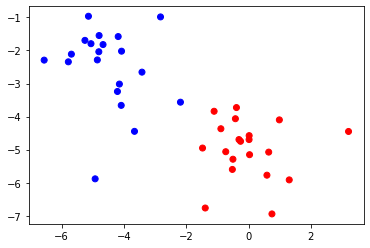

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dots, labels = make_blobs(n_samples=40,centers=2,n_features=2,random_state=50)
colors = ['red' if label == 0 else 'blue' for label in labels]
plt.scatter(dots[:,0],dots[:,1],color=colors)

Neuroverkon ennuste ensimmäiselle syötteelle: [0.53658056]. Neuroverkon virhe: [0.10737879] 

Epoch 100 Loss: [0.06121016]
Epoch 200 Loss: [0.01608798]
Epoch 300 Loss: [0.00690448]
Epoch 400 Loss: [0.00397836]
Epoch 500 Loss: [0.00270766]
Epoch 600 Loss: [0.00202603]
Epoch 700 Loss: [0.00160936]
Epoch 800 Loss: [0.00133372]
Epoch 900 Loss: [0.00114591]
Epoch 1000 Loss: [0.00104232]


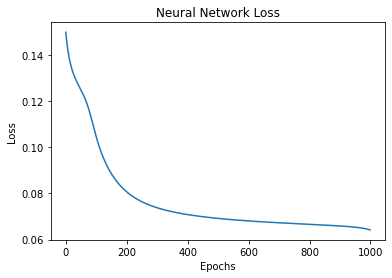

Pisteen väritunnistusarvot olivat punainen jos arvo on 0 ja sininen jos arvo on 1, ja tulos on: [[0.49549057]]


In [11]:
# Tehtävän toteutus jatkuu tästä

X = dots
y = labels
train_X2 = dots
train_y2 = labels

class NeuralNetwork:
    def __init__(self):
        self.weights1 = np.random.rand(2,6)
        self.weights2 = np.random.rand(6,1)
        
    def loss_function(self,true,prediction):
        return 0.5 * (true - prediction)**2
    
    def loss_function_derivative(self,true,prediction):
        return true - prediction
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self,x):
        return x * (1 - x)
    
    def forwardpropagation(self,X,y):
        self.X = np.array([X])
        self.y = np.array([y])
        self.layer1 = self.sigmoid(np.dot(self.X, self.weights1))
        self.output = self.sigmoid(np.dot(self.layer1, self.weights2))
        self.loss = self.loss_function(self.y, self.output)

    def backpropagation(self, learning_rate):
        output_error = self.loss_function_derivative(self.y, self.output)
        output_delta = output_error * self.sigmoid_derivative(self.output)
        weights2_adjustment = np.dot(self.layer1.T, output_delta)

        layer1_error = np.dot(output_delta, self.weights2.T)
        layer1_delta = layer1_error * self.sigmoid_derivative(self.layer1)
        weights1_adjustment = np.dot(self.X.T, layer1_delta)
        
        self.weights2 += learning_rate * weights2_adjustment
        self.weights1 += learning_rate * weights1_adjustment
                                      
neural_network = NeuralNetwork()
neural_network.forwardpropagation(train_X2[0], train_y2[0])
print(f"Neuroverkon ennuste ensimmäiselle syötteelle: {neural_network.output[0]}. Neuroverkon virhe: {neural_network.loss[0]} \n")
neural_network.backpropagation(learning_rate = 0.01)

epoch_losses = []
epochs = 1000
for epoch in range(1,epochs+1):
    batch_losses = []
    for X,y in zip(train_X2,train_y2):
        neural_network.forwardpropagation(X,y)
        neural_network.backpropagation(learning_rate = 0.01)
        batch_losses.append(neural_network.loss[0])
    epoch_losses.append(np.average(batch_losses))
    if epoch % 100 == 0:
        print(f"Epoch {epoch} Loss: {neural_network.loss[0]}")

fig, ax = plt.subplots()
ax.plot(epoch_losses)
ax.set_title("Neural Network Loss")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.show()

test_X2 = np.array([[0.1,-5.8]])

layer1_output = neural_network.sigmoid(np.dot(test_X2, neural_network.weights1))
test_output = neural_network.sigmoid(np.dot(layer1_output, neural_network.weights2))
test_output
output = test_output
print("Pisteen väritunnistusarvot olivat punainen jos arvo on 0 ja sininen jos arvo on 1, ja tulos on:", output)

In [12]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita output - muuttujaan neuroverkon ennuste syötölle [0.1,-5.8]
print(output)

[[0.49549057]]


# Tehtävä 3
### Aihe: Yksinkertainen neuroverkko Keras Sequential API:lla
3,3 pistettä

Koulutetaan yksinkertainen neuroverkko Kerassilla käyttäen tehtävässä 1 puhdistettua diabetes datasettiä. (Jos tehtävän teko ei onnistunut, lataa datasetti Kagglesta)

Tehtävästä on löydyttävä vaiheet:
1. Luo neuroverkko (käytä tf.keras.Sequential() funktiota)
2. Määritä häviöfunktio ja optimisaattori (käytä model.compile() funktiota)
3. Kouluta neuroverkko (käytä model.fit() funktiota)
4. Vertaa neuroverkon ennustuksia testidataan (käytä model.evaluate() funktiota)
5. Aja "Tehtävän vastaukset" solu

In [6]:
# Tehtävän toteutus
tf.keras.backend.set_floatx('float64')

#df
df_minmax = df_minmax.sample(frac = 1)

train_dataset = tf.data.Dataset.from_tensor_slices((train_X,train_y))
test_dataset = tf.data.Dataset.from_tensor_slices((test_X,test_y))

#train_dataset.shape()

train_dataset,test_dataset  = train_dataset.batch(1), test_dataset.batch(1)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_dataset, 
          epochs=20)

print("\n")
results = model.evaluate(test_dataset)
print("\n Tulos decimaaleina: ", results)

605
Epoch 1/20
150/150 [==============================] - 0s 344us/step - loss: 9.6606 - accuracy: 0.1733
Epoch 2/20
150/150 [==============================] - 0s 337us/step - loss: 2.7664 - accuracy: 0.4067
Epoch 3/20
150/150 [==============================] - 0s 327us/step - loss: 1.8938 - accuracy: 0.4333
Epoch 4/20
150/150 [==============================] - 0s 327us/step - loss: 1.4033 - accuracy: 0.5733
Epoch 5/20
150/150 [==============================] - 0s 327us/step - loss: 1.0268 - accuracy: 0.6200
Epoch 6/20
150/150 [==============================] - 0s 331us/step - loss: 0.8466 - accuracy: 0.6133
Epoch 7/20
150/150 [==============================] - 0s 327us/step - loss: 0.7708 - accuracy: 0.6133
Epoch 8/20
150/150 [==============================] - 0s 327us/step - loss: 0.7208 - accuracy: 0.6067
Epoch 9/20
150/150 [==============================] - 0s 327us/step - loss: 0.6947 - accuracy: 0.6333
Epoch 10/20
150/150 [==============================] - 0s 331us/step - loss: 0

In [7]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita results - muuttujaan funktion model.evaluate() tulos.
# Muista määrittää model.compile() - funktioon seurattavaksi suureeksi metrics=['accuracy'], jotta näät, kuinka suuri osa neuroverkon ennustuksista on oikein.
print(f"Test Loss: {results[0]}. Test Accuracy: {results[1]*100}%.")

Test Loss: 0.6362824208480268. Test Accuracy: 65.28925619834712%.
